# The IMDB dataset

In [1]:
# from tensorflow.keras.datasets import imdb
# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
# training data
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
# convert numeric data in readable format

word_index = imdb.get_word_index()

reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join( [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
# Encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
# The model definition
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
# compiling the model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [17]:
# Configuring the optimizer
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [21]:
# using custom loses and metrices
from tensorflow.keras import losses
from tensorflow.keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [22]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
# Training your model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 164us/sample - loss: 0.5061 - acc: 0.7876 - val_loss: 0.3825 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 2s 120us/sample - loss: 0.3035 - acc: 0.9007 - val_loss: 0.3165 - val_acc: 0.8774
Epoch 3/20
15000/15000 [==============================] - 2s 111us/sample - loss: 0.2232 - acc: 0.9267 - val_loss: 0.2989 - val_acc: 0.8791
Epoch 4/20
15000/15000 [==============================] - 2s 109us/sample - loss: 0.1745 - acc: 0.9443 - val_loss: 0.2774 - val_acc: 0.8903
Epoch 5/20
15000/15000 [==============================] - 2s 107us/sample - loss: 0.1451 - acc: 0.9522 - val_loss: 0.2831 - val_acc: 0.8880
Epoch 6/20
15000/15000 [==============================] - 2s 107us/sample - loss: 0.1185 - acc: 0.9635 - val_loss: 0.2965 - val_acc: 0.8841
Epoch 7/20
15000/15000 [==============================] - 2s 110us/sample - loss: 0.0984 - acc: 0.9711 - val_l

In [24]:
# Note that the call to model.fit() returns a History object. This object has a member
# history, which is a dictionary containing data about everything that happened
# during training. Let’s look at it:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

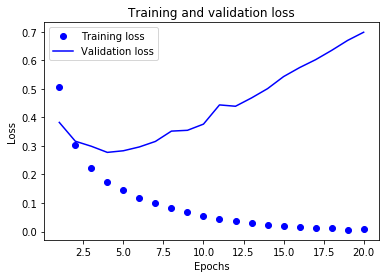

In [26]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

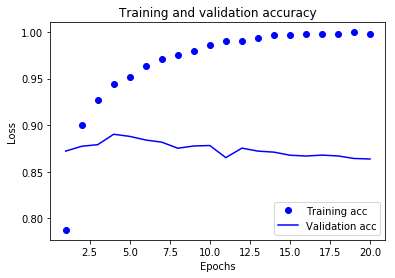

In [28]:
# Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [30]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)



Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 89us/sample - loss: 0.4558 - accuracy: 0.8280
Epoch 2/4
25000/25000 [==============================] - 2s 71us/sample - loss: 0.2621 - accuracy: 0.9080
Epoch 3/4
25000/25000 [==============================] - 2s 71us/sample - loss: 0.2002 - accuracy: 0.9273
Epoch 4/4
25000/25000 [==============================] - 2s 70us/sample - loss: 0.1684 - accuracy: 0.9412


In [31]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 3s 105us/sample - loss: 0.2926 - accuracy: 0.8834


[0.29263140873909, 0.88344]

In [32]:
model.predict(x_test)

array([[0.17948143],
       [0.9998117 ],
       [0.87184095],
       ...,
       [0.08480289],
       [0.05425915],
       [0.6096363 ]], dtype=float32)